# Bandits

## Hygene

In [7]:
import numpy
from scipy.stats import bernoulli, beta, uniform
import matplotlib.pyplot as plt

In [2]:
thetas = numpy.array([0.9, 0.8, 0.7])
k = thetas.shape[0]
N = 500
sims = 5_000

In [3]:
observations = bernoulli(thetas).rvs((N, sims, k))

## Greedy Strategy

In [16]:
alphas = numpy.ones((sims, k))
betas = numpy.ones((sims, k))

actions_g = []
idx = numpy.arange(sims)


# explore
N_exp = 50
for t in range(N_exp):
    a = numpy.random.choice(k, size=sims)
    r = observations[t, idx, a] # reward ofr action a in step t
    alphas[idx, a] += r
    betas[idx, a] += (1-r)
    actions_g.append(a)

# exploit
for t in range(N_exp, N):
    theta_hat = alphas / (alphas + betas)
    a = numpy.argmax(theta_hat, axis=1)
    r = observations[t, idx, a] # reward ofr action a in step t
    alphas[idx, a] += r
    betas[idx, a] += (1-r)
    actions_g.append(a)

In [17]:
actions_g[0]

array([2, 2, 1, ..., 2, 2, 1])

In [18]:
a_g = numpy.array(actions_g)

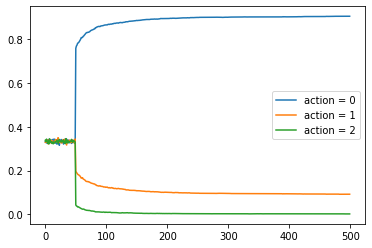

In [19]:
for a in range(k):
    plt.plot((a_g == a).mean(axis=1), label=f"action = {a}")
plt.legend()

## $\epsilon$-Greedy

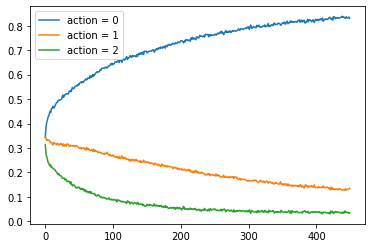

In [36]:
alphas = numpy.ones((sims, k)) + numpy.random.uniform(-0.01, 0.01, size=(sims, k))
betas = numpy.ones((sims, k))
epsilon = 0.1

actions_eg = []
idx = numpy.arange(sims)

for t in range(N_exp, N):
    theta_hat = alphas / (alphas + betas)
    a = numpy.argmax(theta_hat, axis=1)
    random_a = numpy.random.choice(k, size=sims)
    random_mask = numpy.random.uniform(0, 1, size=sims) < epsilon
    a[random_mask] = random_a[random_mask]
    r = observations[t, idx, a] # reward ofr action a in step t
    alphas[idx, a] += r
    betas[idx, a] += (1-r)
    actions_eg.append(a)
a_eg = numpy.array(actions_eg)
for a in range(k):
    plt.plot((a_eg == a).mean(axis=1), label=f"action = {a}")
plt.legend()

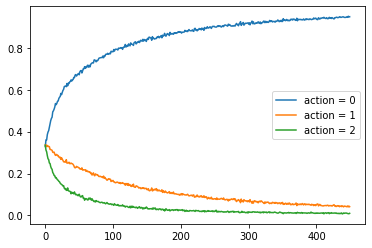

In [35]:
alphas = numpy.ones((sims, k)) + numpy.random.uniform(-0.01, 0.01, size=(sims, k))
betas = numpy.ones((sims, k))


actions_ts = []
idx = numpy.arange(sims)

for t in range(N_exp, N):
    #theta_hat = alphas / (alphas + betas)b
    a = numpy.argmax(beta(alphas, betas).rvs((sims, k)), axis=1)
    r = observations[t, idx, a] # reward ofr action a in step t
    alphas[idx, a] += r
    betas[idx, a] += (1-r)
    actions_ts.append(a)
a_ts = numpy.array(actions_ts)
for a in range(k):
    plt.plot((a_ts == a).mean(axis=1), label=f"action = {a}")
plt.legend()

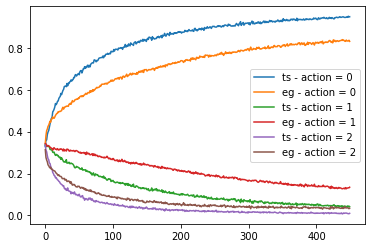

In [37]:
for a in range(k):
    plt.plot((a_ts == a).mean(axis=1), label=f"ts - action = {a}")
    plt.plot((a_eg == a).mean(axis=1), label=f"eg - action = {a}")
plt.legend()

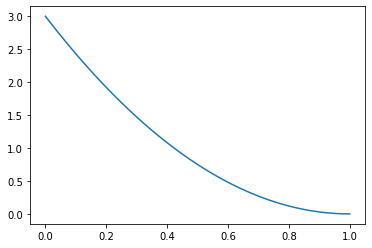

In [33]:
plt.plot(numpy.linspace(0, 1, 100),
         beta(1, 3).pdf(numpy.linspace(0, 1, 100)))